In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt


import seaborn as sns # for plot visualization
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller, acf, pacf, kpss
from statsmodels.tsa.seasonal import seasonal_decompose
import os
#print(os.listdir("C:\\Users\pc\Desktop\Studies\KTH\TSA\delhi-weather-data"))


weather_df = pd.read_csv("testset.csv", parse_dates=['datetime_utc'], index_col='datetime_utc')
weather_df.head()    
    

_conds   _dewptm   _fog   _hail   _heatindexm   _hum  \
datetime_utc                                                                
1996-11-01 11:00:00   Smoke       9.0      0       0           NaN   27.0   
1996-11-01 12:00:00   Smoke      10.0      0       0           NaN   32.0   
1996-11-01 13:00:00   Smoke      11.0      0       0           NaN   44.0   
1996-11-01 14:00:00   Smoke      10.0      0       0           NaN   41.0   
1996-11-01 16:00:00   Smoke      11.0      0       0           NaN   47.0   

                      _precipm   _pressurem   _rain   _snow   _tempm  \
datetime_utc                                                           
1996-11-01 11:00:00        NaN       1010.0       0       0     30.0   
1996-11-01 12:00:00        NaN      -9999.0       0       0     28.0   
1996-11-01 13:00:00        NaN      -9999.0       0       0     24.0   
1996-11-01 14:00:00        NaN       1010.0       0       0     24.0   
1996-11-01 16:00:00        NaN       1011.0       0       0     23.0   

                      _thunder   _tornado   _vism   _wdird  _wdire   _wgustm  \
datetime_utc                                                                   
1996-11-01 11:00:00          0          0     5.0    280.0    West       NaN   
1996-11-01 12:00:00          0          0     NaN      0.0   North       NaN   
1996-11-01 13:00:00          0          0     NaN      0.0   North       NaN   
1996-11-01 14:00:00          0          0     2.0      0.0   North       NaN   
1996-11-01 16:00:00          0          0     1.2      0.0   North       NaN   

                      _windchillm   _wspdm  
datetime_utc                                
1996-11-01 11:00:00           NaN      7.4  
1996-11-01 12:00:00           NaN      NaN  
1996-11-01 13:00:00           NaN      NaN  
1996-11-01 14:00:00           NaN      NaN  
1996-11-01 16:00:00           NaN      0.0

In [2]:
weather_hum_temp = weather_df.loc[:,[' _hum', ' _tempm']]
#print(f'dataset shape (rows, columns) - {weather_df.shape}')
print(weather_hum_temp.dtypes, weather_hum_temp.index.dtype)
weather_hum_temp.head()

( _hum      float64
 _tempm    float64
dtype: object, dtype('<M8[ns]'))


_hum   _tempm
datetime_utc                       
1996-11-01 11:00:00   27.0     30.0
1996-11-01 12:00:00   32.0     28.0
1996-11-01 13:00:00   44.0     24.0
1996-11-01 14:00:00   41.0     24.0
1996-11-01 16:00:00   47.0     23.0

In [3]:
weather_df.index = pd.to_datetime(weather_df.index)
weather_df.index

DatetimeIndex(['1996-11-01 11:00:00', '1996-11-01 12:00:00',
               '1996-11-01 13:00:00', '1996-11-01 14:00:00',
               '1996-11-01 16:00:00', '1996-11-01 17:00:00',
               '1996-11-01 18:00:00', '1996-11-01 19:00:00',
               '1996-11-01 20:00:00', '1996-11-01 21:00:00',
               ...
               '2017-04-23 15:00:00', '2017-04-23 18:00:00',
               '2017-04-23 21:00:00', '2017-04-24 00:00:00',
               '2017-04-24 03:00:00', '2017-04-24 06:00:00',
               '2017-04-24 09:00:00', '2017-04-24 12:00:00',
               '2017-04-24 15:00:00', '2017-04-24 18:00:00'],
              dtype='datetime64[ns]', name=u'datetime_utc', length=100990, freq=None)

In [4]:
weather_hum_temp.describe()

_hum         _tempm
count  100233.000000  100317.000000
mean       57.909481      25.451269
std        23.807771       8.482859
min         4.000000       1.000000
25%        39.000000      19.000000
50%        59.000000      27.000000
75%        78.000000      32.000000
max       243.000000      90.000000

==> Some data is missing 

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd7ed6f80d0>,
      dtype=object)

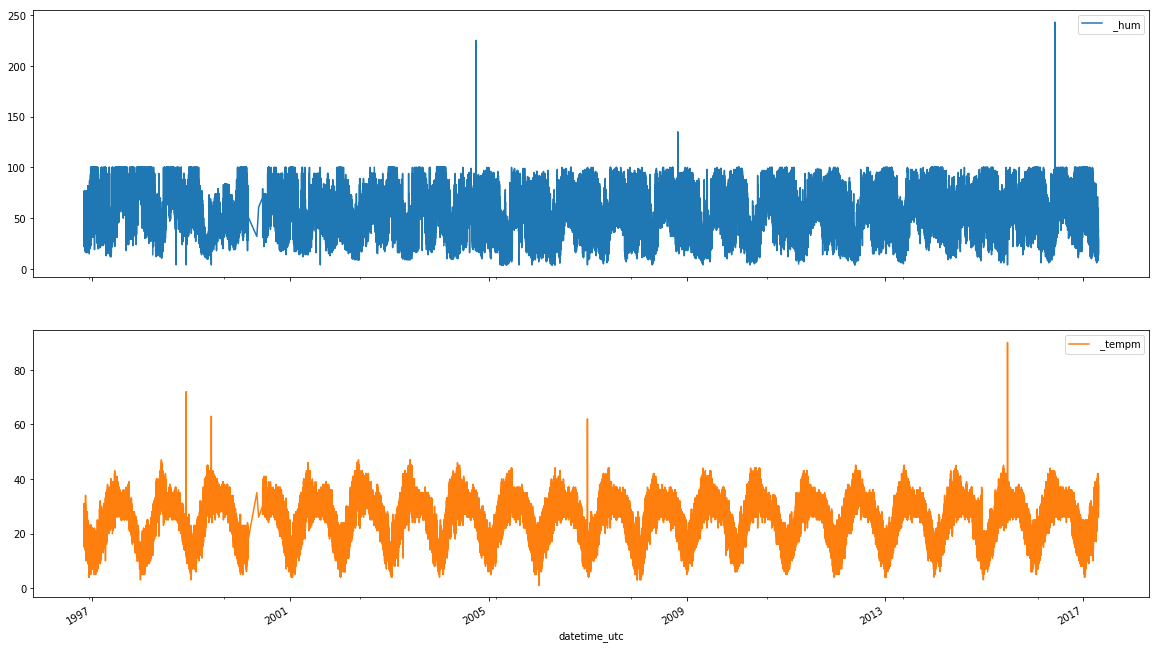

In [5]:
weather_hum_temp.plot(subplots=True, figsize=(20,12))

STEPS:

***Prepare the data***

***Check Stationarity and the trends***

***Transform it to stationary if not***

***Use ACVF and PACF to guess the model***

***Fit to a model: ARMA, AR, MA***


In [6]:
 #Prep data temp

( _tempm    float64
dtype: object, dtype('<M8[ns]'))


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd818519b90>],
      dtype=object)

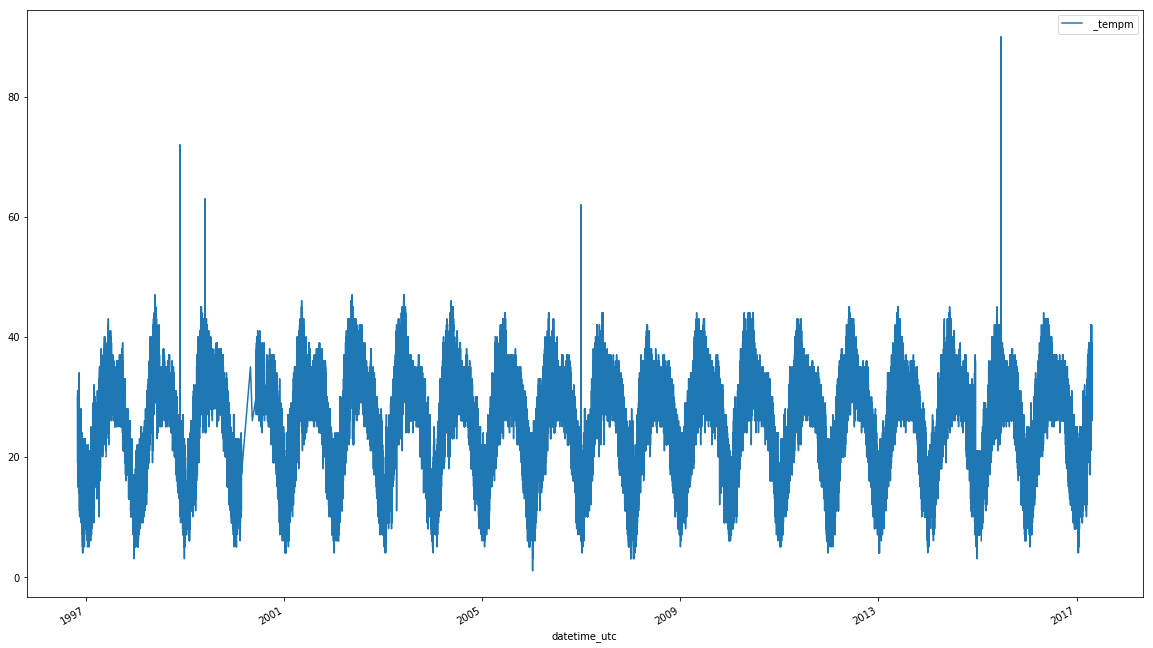

In [7]:
temp = weather_df.loc[:,[' _tempm']]
#print(f'dataset shape (rows, columns) - {weather_df.shape}')
print(temp.dtypes, temp.index.dtype)
temp.head()
temp.describe()
temp.plot(subplots=True, figsize=(20,12))

==> A lot of missing data before 2001 remove all that data from the analysis.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd813cd2e90>],
      dtype=object)

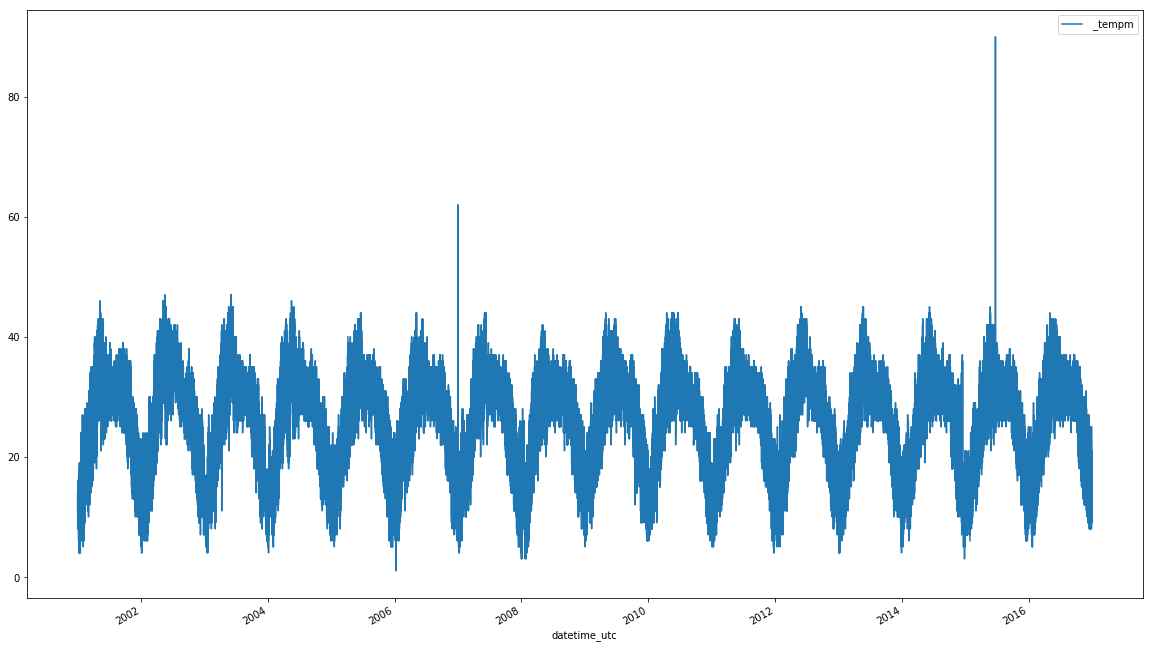

In [8]:
temp_clean = temp['2001':'2016']
temp_clean.plot(subplots=True, figsize=(20,12))

In [9]:
# Seasonality:

#These components are defined as follows:

#Level: The average value in the series.
#Trend: The increasing or decreasing value in the series.
#Seasonality: The repeating short-term cycle in the series.
#Noise: The random variation in the series.

#Model to be used: 
#y(t) = Level + Trend + Seasonality + Noise


/home/lorien/.local/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  """Entry point for launching an IPython kernel.


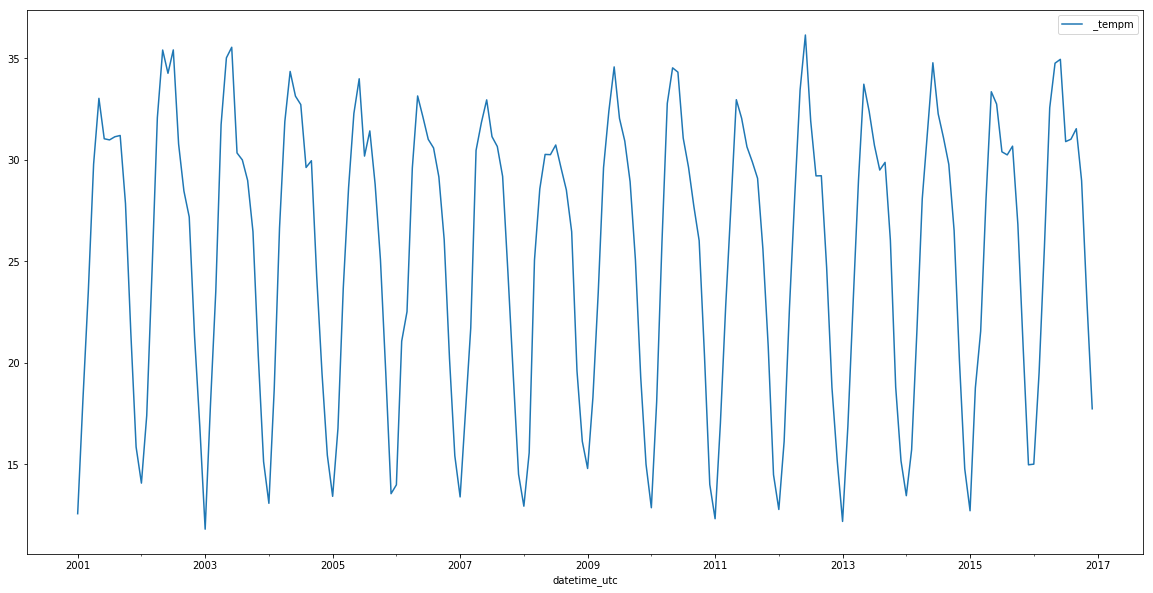

In [10]:
temp_moy = temp_clean.resample('M', how='mean')

#print(temp_clean.count())
#print(temp_moy.count())
temp_moy.plot(figsize=(20,10))
#print(temp_moy)

#print(temp_clean.isna().sum())
#print(temp_moy.isna().sum())

temp_moy_int = temp_moy.interpolate()


==> Resample by month using the mean
==> Get rid of the outliers

In [11]:
not_nan_bool = temp_moy_int[' _tempm'].notna()
df_moy=temp_moy_int[not_nan_bool]
array_moy=df_moy.values.ravel()
result = adfuller(array_moy, autolag='AIC')

print("Test statistic = {:.3f}".format(result[0]))
print("P-value = {:.3f}".format(result[1]))
print("Critical values :")
for k, v in result[4].items():
    print("\t{}: {} - The data is {} stationary with {}% confidence".format(k, v, "not" if v<result[0] else "", 100-int(k[:-1])))
    

Test statistic = -1.073
P-value = 0.726
Critical values :
	5%: -2.8777347668 - The data is not stationary with 95% confidence
	1%: -3.46721115106 - The data is not stationary with 99% confidence
	10%: -2.5754033642 - The data is not stationary with 90% confidence


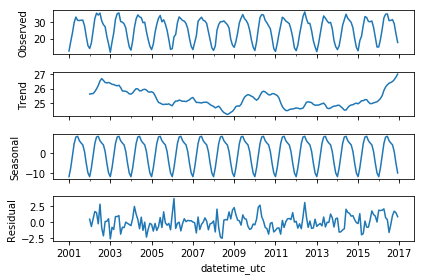

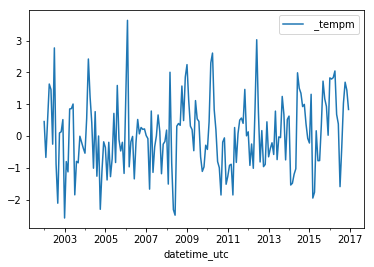

In [12]:
seas = seasonal_decompose(temp_moy_int,model='additive', freq=12, two_sided=False) 
seas.plot()
seas.resid.plot()


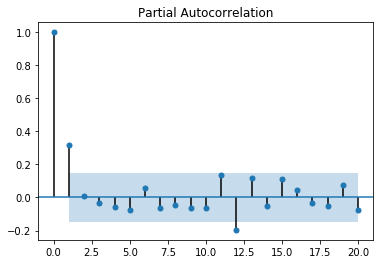

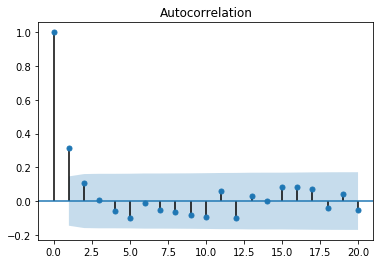

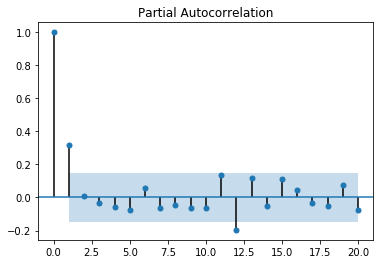

In [13]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
not_nan_bool = seas.resid[' _tempm'].notna()
df=seas.resid[not_nan_bool]
plot_acf(df, lags=20)
plot_pacf(df, lags=20)

In [14]:
not_nan_bool = seas.resid[' _tempm'].notna()
df_resid=seas.resid[not_nan_bool]
array_resid=df_resid.values.ravel()
result = adfuller(array_resid, autolag='AIC')

print("Test statistic = {:.3f}".format(result[0]))
print("P-value = {:.3f}".format(result[1]))
print("Critical values :")
for k, v in result[4].items():
    print("\t{}: {} - The data is {} stationary with {}% confidence".format(k, v, "not" if v<result[0] else "", 100-int(k[:-1])))
    

Test statistic = -9.582
P-value = 0.000
Critical values :
	5%: -2.87782605184 - The data is  stationary with 95% confidence
	1%: -3.46742014325 - The data is  stationary with 99% confidence
	10%: -2.57545208233 - The data is  stationary with 90% confidence


('ARMA Model RSS Score', set([207.60747736641488]))
('ARMA Model RMSE', set([1.0739529199447526]))


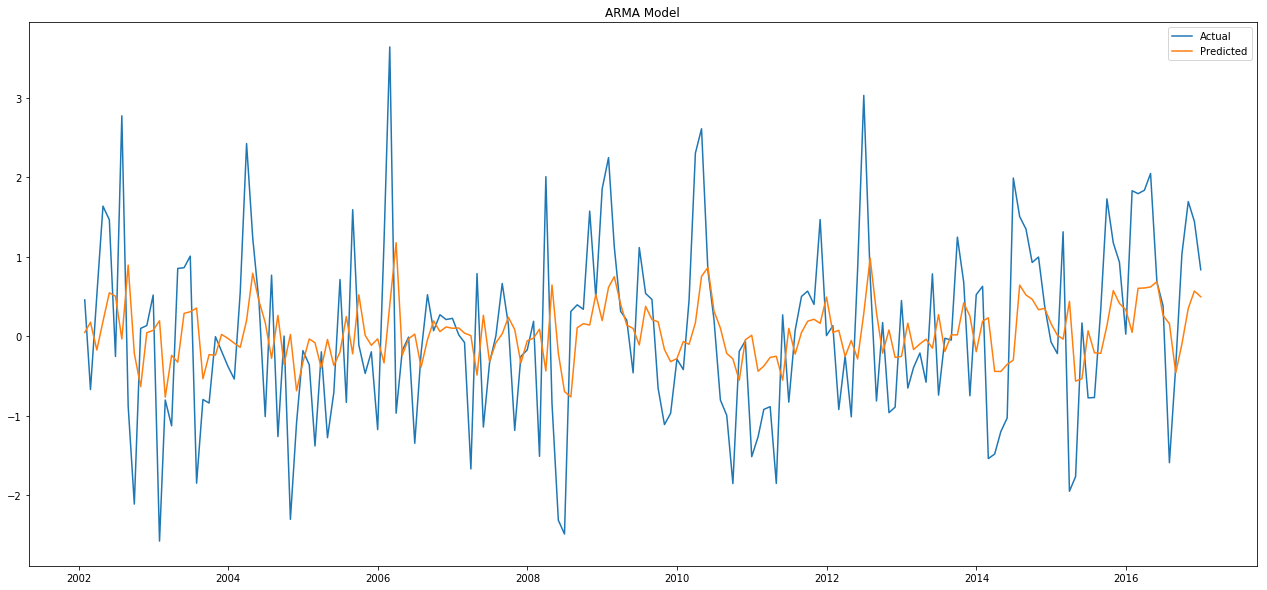

180
180


In [15]:
from statsmodels.tsa.arima_model import ARMA

ts = df
data = ts[' _tempm'].values
model = ARMA(ts, order=(1,1))
MA_model = model.fit(disp=1, method='mle')
print('ARMA Model RSS Score',{sum((MA_model.fittedvalues - data)**2)})
print('ARMA Model RMSE',{np.sqrt(sum((MA_model.fittedvalues-data)**2)/len(data))})
plt.figure(figsize=(22,10))
plt.plot(ts, label='Actual')
plt.plot(MA_model.fittedvalues, label='Predicted')
plt.title('ARMA Model')
plt.legend()
plt.show()

print(len(data))
print(len(MA_model.fittedvalues))